# NLP - Bag of Words

In this NLP project, I will be classifying Yelp Reviews into 1-star or 5-star categories based on the text content in the reviews.

The data is taken from: https://www.kaggle.com/c/yelp-recsys-2013

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business (Higher stars are better). In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv('yelp.csv')

In [3]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [10]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [19]:
#create a new column to represent the lengths of each message
data['text_length'] = data['text'].apply(len)

In [20]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# Data Visualisation

Visualise the distribution of each star rating.

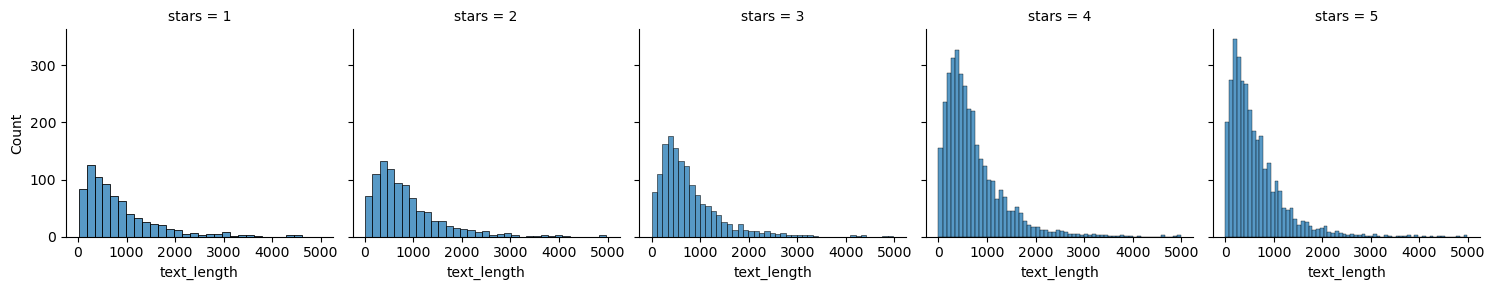

In [29]:
g = sns.FacetGrid(data = data, col = 'stars')
g.map_dataframe(sns.histplot, x ='text_length')

The data is very left-skewed.

<Axes: xlabel='stars', ylabel='text_length'>

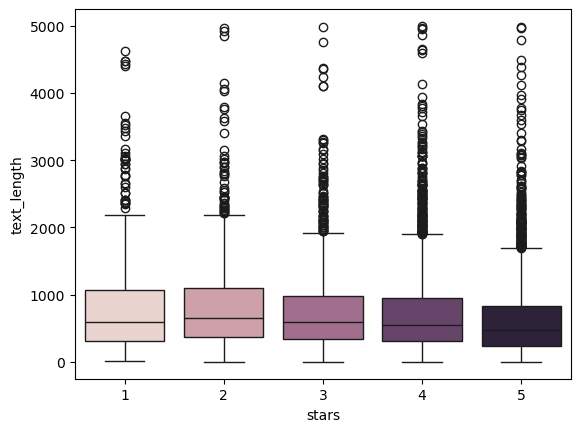

In [35]:
sns.boxplot(data = data, hue = 'stars', y = 'text_length', x='stars', legend=False)

Lower reviews seem to have higher text lengths.

<Axes: xlabel='stars', ylabel='count'>

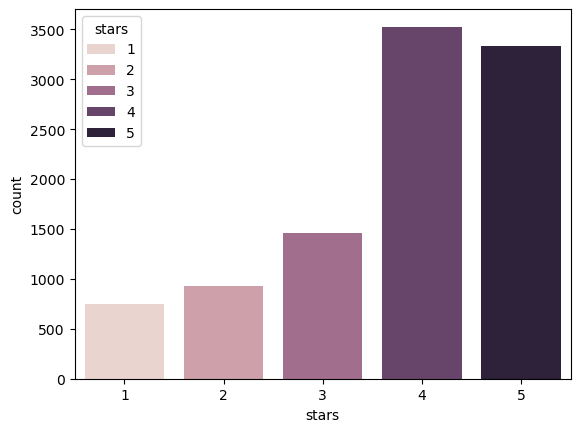

In [36]:
sns.countplot(data = data , hue = 'stars', x = 'stars')

The stars classes are very unbalanced.

In [43]:
cols = ['cool',	'useful','funny','text_length']
data.groupby('stars')[cols].mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<Axes: >

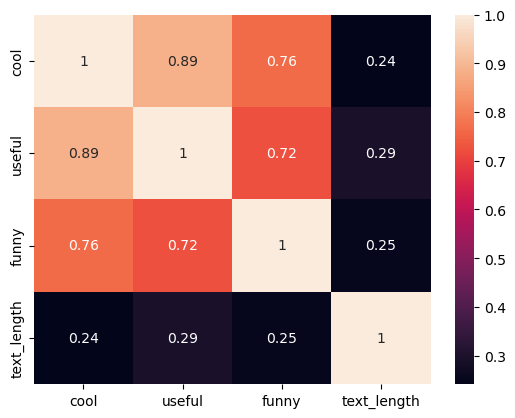

In [55]:
# correlation heatmap of the numerical features.
sns.heatmap(data[cols].corr(), annot = True)

Subset the dataset to only contain 5 and 1 star reviews.

In [75]:
yelp_class = data[(data['stars']==5) | (data['stars'] == 1)]

yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


# Vectorise the text data using bag of words

In [76]:
X = yelp_class['text']
y = yelp_class['stars']

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
bow_transformer = CountVectorizer()

In [83]:
X = bow_transformer.fit_transform(X)

# Create a Classifier model

 Split the data into a Training and Testing set.

In [85]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
from sklearn.naive_bayes import MultinomialNB

Create a naive Bayes model.

In [90]:
nb = MultinomialNB()

In [92]:
nb.fit(X_train,y_train)
pred = nb.predict(X_test)

Evaluate the model's performance.

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# Using text Processing to see if the model performance improves

In [98]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.pipeline import Pipeline

Simplify the workflow by implementing a pipeline.

In [102]:
pipe = Pipeline([('bow',CountVectorizer()),
                 ('Tfidf',TfidfTransformer()),
                 ('nb',MultinomialNB())])


In [103]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [104]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('Tfidf', TfidfTransformer()),
                ('nb', MultinomialNB())])

In [105]:
pred = pipe.predict(X_test)

In [106]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\Reuben\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Reuben\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Reuben\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In this circumstance Tf-IDF made the model perform much worse in terms of predicting 1 star reviews. 

# Logistic regression approach

In [107]:
from sklearn.linear_model import LogisticRegression

In [109]:
pipe = Pipeline([('bow',CountVectorizer()),
                 ('Tfidf',TfidfTransformer()),
                 ('lr',LogisticRegression())])


In [110]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('Tfidf', TfidfTransformer()),
                ('lr', LogisticRegression())])

In [111]:
pred = pipe.predict(X_test)

In [112]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

[[ 99 129]
 [  2 996]]


              precision    recall  f1-score   support

           1       0.98      0.43      0.60       228
           5       0.89      1.00      0.94       998

    accuracy                           0.89      1226
   macro avg       0.93      0.72      0.77      1226
weighted avg       0.90      0.89      0.88      1226



In [114]:
pipe = Pipeline([('bow',CountVectorizer()),
                 ('lr',LogisticRegression())])


In [115]:
pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

[[175  53]
 [ 26 972]]


              precision    recall  f1-score   support

           1       0.87      0.77      0.82       228
           5       0.95      0.97      0.96       998

    accuracy                           0.94      1226
   macro avg       0.91      0.87      0.89      1226
weighted avg       0.93      0.94      0.93      1226



# Conclusion - model evaluation

Logistic regression performed significantly better than Naive Bayes on the TF-IDF transformed data. This is likely because Naive Bayes failed to predict any 1-star reviews, which are the minority class and therefore harder to learn due to class imbalance. Given this imbalance, accuracy alone is not a reliable metric; instead, the F1 score provides a more informative evaluation of model performance. Logistic regression also outperformed Naive Bayes on the vectorised data. Overall, the best-performing model was logistic regression using the vectorised text data, achieving an accuracy of 0.94 and F1 scores of 0.96 and 0.82 for 5-star and 1-star reviews, respectively. These results suggest that the model can reliably predict review ratings based on text. However, performance would likely decline if all star ratings were included, as the model would then need to capture more nuanced differences between rating levels.